In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

In [5]:
sales = pd.read_excel('sales.xlsx')
sales

,CustomerID,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
0,11054,2021-03-18 00:00:00,85.0,7230.0,1820,3435.0,1600.0,440.0,57.0,1,13,4,13,6,0
1,17117,2021-03-01 00:00:00,96.0,5850.0,320,2745.0,500.0,320.0,8.0,3,9,7,9,6,0
2,31751,2021-11-01 00:00:00,7.0,8380.0,0,1560.0,0.0,0.0,28.0,3,9,5,3,9,0
3,12947,2022-05-19 00:00:00,54.0,5090.0,280,2355.0,140.0,560.0,78.0,3,7,5,11,3,0
4,11402,2021-01-01 00:00:00,64.0,330.0,0,240.0,0.0,0.0,7.0,2,4,1,3,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,23699,2021-11-27 00:00:00,54.0,290.0,20,180.0,0.0,40.0,4.0,2,4,1,4,7,0
7004,23255,2021-03-25 00:00:00,27.0,230.0,80,525.0,20.0,80.0,23.0,3,5,1,3,8,0
7005,5798,2022-04-12 00:00:00,36.0,3050.0,2460,3840.0,1800.0,980.0,107.0,1,8,4,13,4,0
7006,16577,2020-09-01 00:00:00,49.0,20.0,200,90.0,160.0,0.0,14.0,1,3,2,2,8,1


In [6]:
sales.set_index ('CustomerID', inplace = True)

In [7]:
#check for duplicates 
sales [sales.duplicated()]

,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
CustomerID,,,,,,,,,,,,,,
26891,2022-03-21 00:00:00,13.0,610.0,320,915.0,20.0,240.0,78.0,2,6,3,2,6,0
17069,2020-11-24 00:00:00,32.0,1320.0,280,390.0,180.0,100.0,28.0,5,7,2,3,8,0
28844,2022-06-29 00:00:00,43.0,6050.0,140,1275.0,140.0,140.0,7.0,1,10,3,10,4,0
28688,2020-12-29 00:00:00,43.0,5940.0,120,570.0,120.0,120.0,25.0,4,9,3,10,7,0
5627,2022-04-28 00:00:00,31.0,130.0,0,120.0,20.0,20.0,5.0,1,3,1,4,3,0
15905,2020-09-04 00:00:00,3.0,8900.0,1260,4380.0,0.0,500.0,12.0,4,10,5,7,6,0
20747,2020-08-14 00:00:00,63.0,2540.0,1420,6705.0,2020.0,2840.0,20.0,1,5,5,8,1,0
28625,2021-12-25 00:00:00,35.0,60.0,120,120.0,180.0,180.0,18.0,3,4,2,3,6,0


In [8]:
sales.drop_duplicates(inplace= True)

In [9]:
#Basic exploration 

In [10]:
sales.shape

(7000, 14)

In [11]:
sales.columns

Index(['Date_Adherence', 'Recency', 'MntMeat&Fish', 'MntEntries',
       'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts',
       'MntAdditionalRequests', 'NumOfferPurchases', 'NumAppPurchases',
       'NumTakeAwayPurchases', 'NumStorePurchases', 'NumAppVisitsMonth',
       'Complain'],
      dtype='object')

In [12]:
sales.head(5)

,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
CustomerID,,,,,,,,,,,,,,
11054,2021-03-18 00:00:00,85.0,7230.0,1820,3435.0,1600.0,440.0,57.0,1,13,4,13,6,0
17117,2021-03-01 00:00:00,96.0,5850.0,320,2745.0,500.0,320.0,8.0,3,9,7,9,6,0
31751,2021-11-01 00:00:00,7.0,8380.0,0,1560.0,0.0,0.0,28.0,3,9,5,3,9,0
12947,2022-05-19 00:00:00,54.0,5090.0,280,2355.0,140.0,560.0,78.0,3,7,5,11,3,0
11402,2021-01-01 00:00:00,64.0,330.0,0,240.0,0.0,0.0,7.0,2,4,1,3,8,0


In [13]:
sales.tail(5)

,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
CustomerID,,,,,,,,,,,,,,
23699,2021-11-27 00:00:00,54.0,290.0,20,180.0,0.0,40.0,4.0,2,4,1,4,7,0
23255,2021-03-25 00:00:00,27.0,230.0,80,525.0,20.0,80.0,23.0,3,5,1,3,8,0
5798,2022-04-12 00:00:00,36.0,3050.0,2460,3840.0,1800.0,980.0,107.0,1,8,4,13,4,0
16577,2020-09-01 00:00:00,49.0,20.0,200,90.0,160.0,0.0,14.0,1,3,2,2,8,1
25310,2020-12-05 00:00:00,74.0,160.0,100,180.0,680.0,80.0,13.0,3,3,2,4,4,0


In [14]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 11054 to 25310
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date_Adherence         7000 non-null   object 
 1   Recency                6977 non-null   float64
 2   MntMeat&Fish           7000 non-null   float64
 3   MntEntries             7000 non-null   int64  
 4   MntVegan&Vegetarian    7000 non-null   float64
 5   MntDrinks              6972 non-null   float64
 6   MntDesserts            7000 non-null   float64
 7   MntAdditionalRequests  7000 non-null   float64
 8   NumOfferPurchases      7000 non-null   int64  
 9   NumAppPurchases        7000 non-null   int64  
 10  NumTakeAwayPurchases   7000 non-null   int64  
 11  NumStorePurchases      7000 non-null   int64  
 12  NumAppVisitsMonth      7000 non-null   int64  
 13  Complain               7000 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 82

we have:
 - 6 float variables 
 - 8 integer variables 
 - 1 object variable 

In [15]:
sales.describe()

,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
count,6977.000000,7000.000000,7000.000000,7000.000000,6972.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,49.235058,3079.523800,534.749429,2785.050786,545.657544,540.656029,42.556186,2.448429,6.015714,3.834571,5.790571,5.278286,0.010286
std,28.922688,3370.377166,787.846684,3908.718244,805.149088,802.221866,49.650747,2.306968,2.745537,3.331142,3.295708,2.748596,0.100903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,250.000000,40.000000,240.000000,40.000000,40.000000,9.000000,1.000000,4.000000,1.000000,3.000000,3.000000,0.000000
50%,49.000000,1820.000000,180.000000,1110.000000,180.000000,180.000000,24.000000,2.000000,6.000000,3.000000,5.000000,5.000000,0.000000
75%,74.000000,5070.000000,680.000000,3795.000000,700.000000,680.000000,57.000000,3.000000,8.000000,5.000000,8.000000,7.000000,0.000000
max,99.000000,14980.000000,3980.000000,25974.000000,3980.000000,3980.000000,249.000000,16.000000,13.000000,24.000000,13.000000,20.000000,1.000000


- `count` we can see that the variable 'Recency' and 'MntDrinks' don't have the 7008 rows filled, this means we have a problem with NA's.
- relação estreita entre Drinks, desserts and entries 


In [16]:
sales.loc[sales[['Recency']].idxmax()] # inspect the max value 99, it could have been coded to not have NA 

,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
CustomerID,,,,,,,,,,,,,,
30641,2022-06-27 00:00:00,99.0,4530.0,760,4185.0,2880.0,760.0,183.0,2,9,8,10,3,0


In [17]:
sales.loc[sales[['MntEntries']].idxmax()]

,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
CustomerID,,,,,,,,,,,,,,
15023,2021-07-23 00:00:00,82.0,3830.0,3980,11730.0,920.0,2440.0,30.0,1,7,3,6,3,0


In [18]:
sales.loc[sales[['MntDrinks']].idxmax()]

,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
CustomerID,,,,,,,,,,,,,,
25541,2020-09-10 00:00:00,6.0,3410.0,2840,1695.0,3980.0,3020.0,66.0,3,8,7,12,5,0


In [19]:
sales.skew()

Recency                  0.017676
MntMeat&Fish             1.148862
MntEntries               2.087220
MntVegan&Vegetarian      2.486897
MntDrinks                2.046308
MntDesserts              2.057811
MntAdditionalRequests    1.826522
NumOfferPurchases        2.860514
NumAppPurchases          0.525873
NumTakeAwayPurchases     2.254158
NumStorePurchases        0.623254
NumAppVisitsMonth        1.005192
Complain                 9.709429
dtype: float64

- `Moderate skewness` : NumAppPurchases  and NumStorePurchases
- `High skewness` : MntMeat&Fish, MntEntries, MntVegan&Vegetarian,MntDrinks,MntDesserts, MntAdditionalRequests, NumOfferPurchases, NumTakeAwayPurchases, NumAppVisitsMonth and   Complain 

In [20]:
sales.kurt()

Recency                  -1.197978
MntMeat&Fish              0.532098
MntEntries                4.096167
MntVegan&Vegetarian       8.431538
MntDrinks                 3.839256
MntDesserts               3.813464
MntAdditionalRequests     3.084190
NumOfferPurchases        10.997946
NumAppPurchases          -0.222899
NumTakeAwayPurchases      8.582138
NumStorePurchases        -0.694327
NumAppVisitsMonth         4.992870
Complain                 92.299387
dtype: float64

- `high Kurtosis (>3): `
MntEntries                
MntVegan&Vegetarian      
MntDrinks                 
MntDesserts               
MntAdditionalRequests    
NumOfferPurchases 
NumTakeAwayPurchases
NumAppVisitsMonth         
Complain                 

VISUAL EXPLO

In [38]:
import numpy as np
import matplotlib.pyplot as plt

(array([ 636., 1289., 1581., 2112., 1315.,    3.,    0.,    0.,    0.,
          64.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

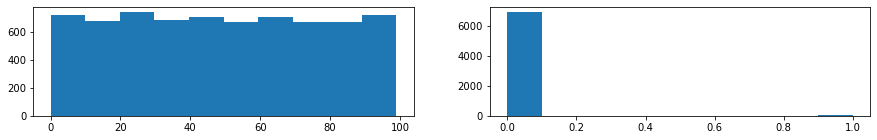

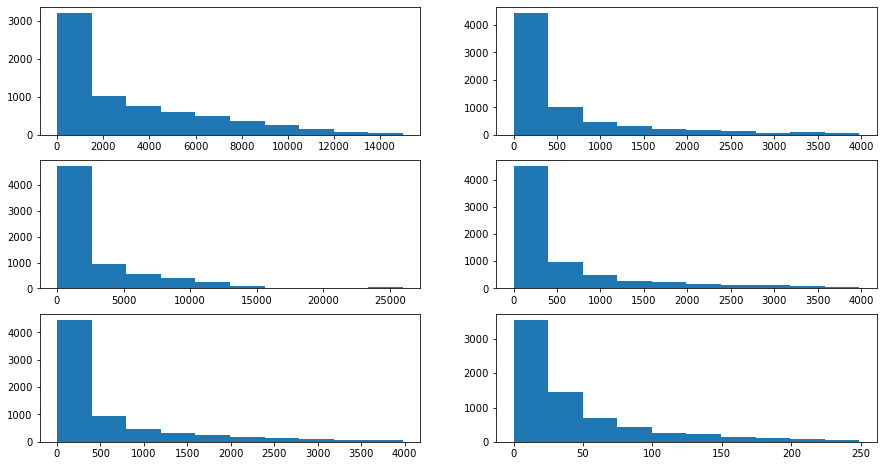

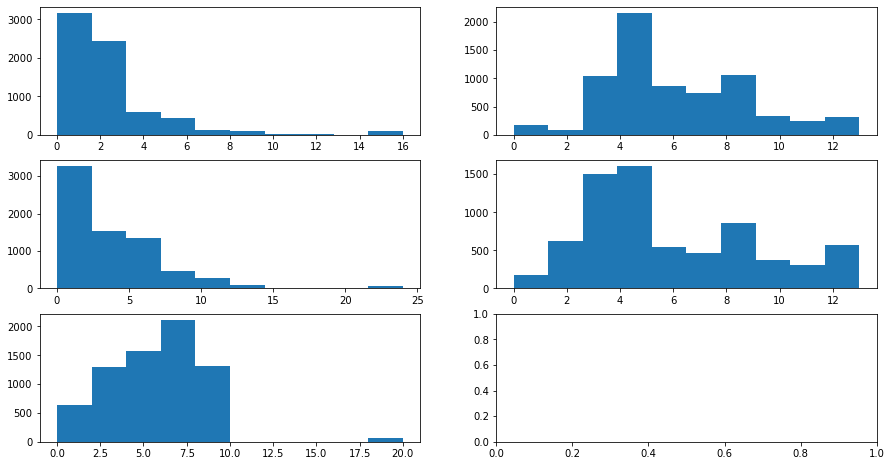

In [39]:
fig, [ax6,ax7] = plt.subplots(nrows=1, ncols = 2, figsize=(15,2)) 
ax6.hist(sales['Recency'])
ax7.hist(sales['Complain'])

fig, [[ax0,ax1],[ax2,ax3],[ax4,ax5]] = plt.subplots(nrows=3, ncols = 2, figsize=(15,8)) 
ax0.hist(sales['MntMeat&Fish'])
ax1.hist(sales['MntEntries'])
ax2.hist(sales['MntVegan&Vegetarian'])
ax3.hist(sales['MntDesserts'])
ax4.hist(sales['MntDrinks'])
ax5.hist(sales['MntAdditionalRequests'])

fig, [[ax8,ax9],[ax10,ax11],[ax12,ax13]] = plt.subplots(nrows=3, ncols = 2, figsize=(15,8))
ax8.hist(sales['NumOfferPurchases'])            
ax9.hist(sales['NumAppPurchases'])          
ax10.hist(sales['NumTakeAwayPurchases'])   
ax11.hist(sales['NumStorePurchases'])        
ax12.hist(sales['NumAppVisitsMonth'])      

#TITULOS E LABELS
#ax2.plot(covid_data['new_cases'])
#ax2.set_title('Number of Cases (Daily) )')
#ax2.set_xlabel('Date')
#ax2.set_ylabel('Number of Cases')



In [47]:
######################################################
######Fazer análise pairing com "teoria" por trás ####

#sales_subset = sales[['MntMeat&Fish','MntEntries', 'MntVegan&Vegetarian','MntDesserts','MntDrinks','MntAdditionalRequests']].copy()
#sns.pairplot(sales_subset)



<AxesSubplot:>

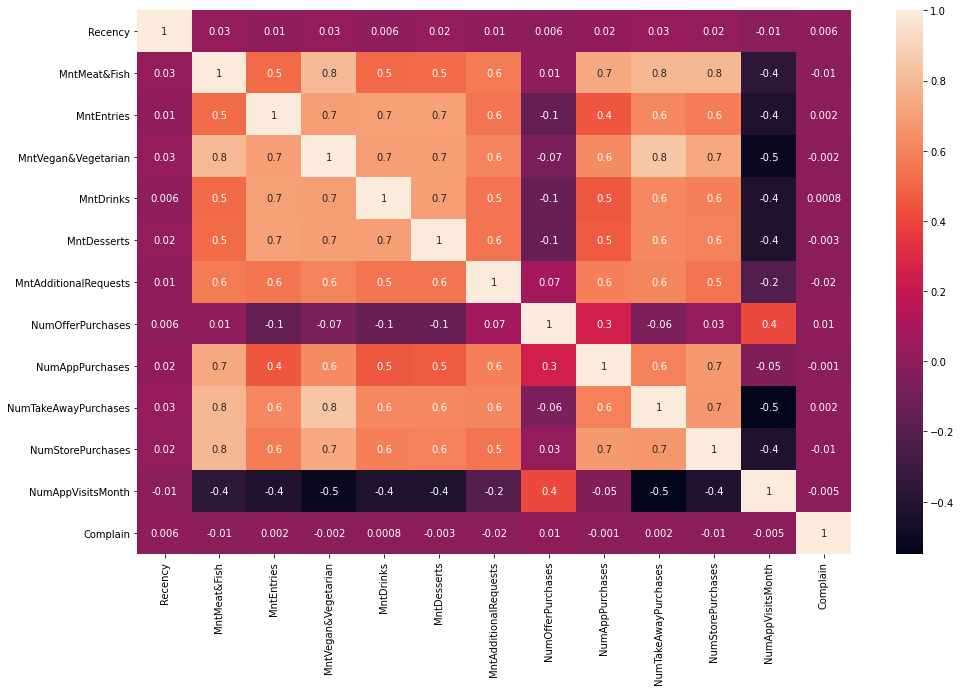

In [49]:
sales_corr = sales.corr(method = 'spearman')
figure = plt.figure(figsize=(16,10))
sns.heatmap(sales_corr, annot=True, fmt = '.1g')

In [ ]:
##Correlation coefficients whose magnitude are between 0.9 and 1.0 indicate variables which 
##can be considered very highly correlated. Correlation coefficients whose magnitude are between 0.7 and 0.9 
##indicate variables which can be considered highly correlated. Correlation coefficients whose
##magnitude are between 0.5 and 0.7 indicate variables which can be considered moderately correlated.
##Correlation coefficients whose magnitude are between 0.3 and 0.5 indicate variables which have a low correlation.